In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data=pd.read_csv("E:diamonds.csv")

In [3]:
Data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
Data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
Data['carat'].isnull().sum()

0

In [7]:
Data['carat'].value_counts()

carat
0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
        ... 
3.02       1
3.65       1
3.50       1
3.22       1
3.11       1
Name: count, Length: 273, dtype: int64

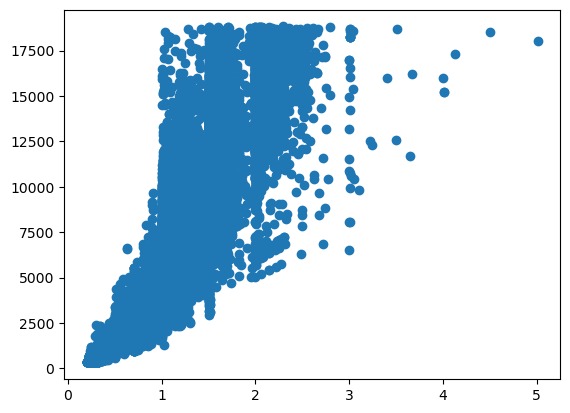

In [8]:
plt.scatter(Data['carat'],Data['price'])

In [9]:
Data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
Data['table'].corr(Data['price'])

0.127133902121742

As we can see table column has very less correlation with price column so dropping this one

In [11]:
Data.drop('table',axis=1,inplace=True)

In [12]:
Data.head()

,carat,cut,color,clarity,depth,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,335,4.34,4.35,2.75


In [13]:
Data['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [14]:
Data['cut'].isnull().sum()

0

In [15]:
Data['price'].isnull().sum()

0

No such diamond can exist whose length or width or depth is zero, so entries with any of these are abnormal and thus dropping them. Also, elements with width(y)>30 and depth(z)>30 seems to be outliers, so removing them too.

In [16]:
Data.drop(Data.loc[(Data['x']==0)|(Data['y']==0)|(Data['z']==0)|(Data['y']>30)|(Data['z']>30)].index,inplace=True)


Checking and dropping duplicate values from our data

In [17]:
Data[Data.duplicated()]
Data.drop_duplicates(inplace=True)

In [18]:
Data

,carat,cut,color,clarity,depth,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,2757,6.15,6.12,3.74


Encoding the values of cut color and clarity

In [19]:
Data['cut'] = Data['cut'].map({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})
Data['color'] = Data['color'].map({'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6})
Data['clarity'] = Data['clarity'].map({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})

In [20]:
Data.corr()

,carat,cut,color,clarity,depth,price,x,y,z
carat,1.000000,-0.132348,-0.290697,-0.352082,0.028572,0.921440,0.977839,0.976922,0.976501
cut,-0.132348,1.000000,0.019738,0.187803,-0.217408,-0.051277,-0.123631,-0.123265,-0.149776
color,-0.290697,0.019738,1.000000,-0.025606,-0.048111,-0.171346,-0.269928,-0.269727,-0.274282
clarity,-0.352082,0.187803,-0.025606,1.000000,-0.067380,-0.145706,-0.372246,-0.366928,-0.375824
depth,0.028572,-0.217408,-0.048111,-0.067380,1.000000,-0.010615,-0.024562,-0.027684,0.097157
price,0.921440,-0.051277,-0.171346,-0.145706,-0.010615,1.000000,0.887046,0.888644,0.881885
x,0.977839,-0.123631,-0.269928,-0.372246,-0.024562,0.887046,1.000000,0.998650,0.991064
y,0.976922,-0.123265,-0.269727,-0.366928,-0.027684,0.888644,0.998650,1.000000,0.990719
z,0.976501,-0.149776,-0.274282,-0.375824,0.097157,0.881885,0.991064,0.990719,1.000000


<Axes: >

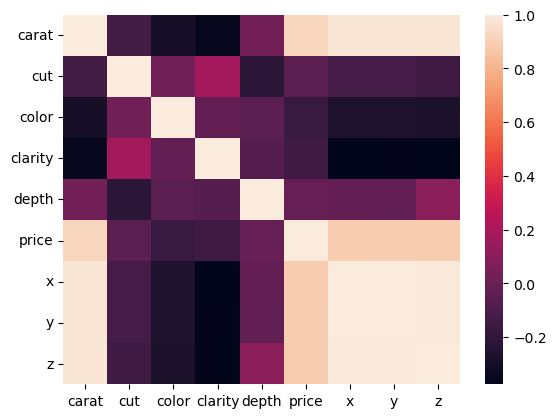

In [41]:
sns.heatmap(Data.corr())

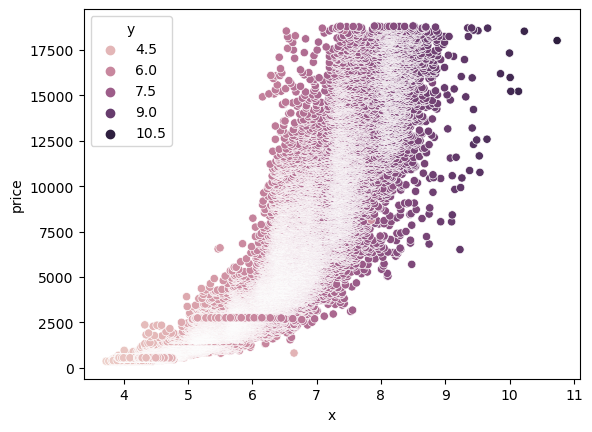

In [47]:
sns.scatterplot(data=Data,x=Data['x'],y=Data['price'],hue=Data['y'])
plt.show()

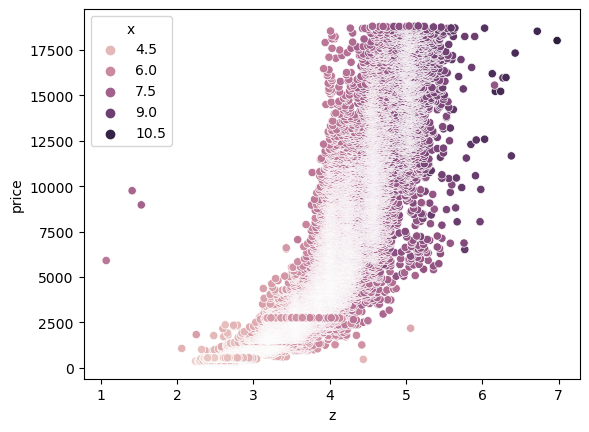

In [53]:
sns.scatterplot(data=Data,x=Data['z'],y=Data['price'],hue=Data['x'])
plt.show()

In [ ]:
Data.to_csv('./Diamonds_cleaned.csv')

In [21]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

In [22]:
model=LinearRegression()

In [23]:
scaler=StandardScaler()

In [24]:
Data.head()

,carat,cut,color,clarity,depth,price,x,y,z
0,0.23,4,5,1,61.5,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,335,4.34,4.35,2.75


In [25]:
x=Data.drop(['price'],axis=1)

In [26]:
y=Data['price']

In [27]:
x.head()

,carat,cut,color,clarity,depth,x,y,z
0,0.23,4,5,1,61.5,3.95,3.98,2.43
1,0.21,3,5,2,59.8,3.89,3.84,2.31
2,0.23,1,5,4,56.9,4.05,4.07,2.31
3,0.29,3,1,3,62.4,4.20,4.23,2.63
4,0.31,1,0,1,63.3,4.34,4.35,2.75


In [28]:
pipe=Pipeline([('scaler',scaler),
              ('model',model)])

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [31]:
x_train

,carat,cut,color,clarity,depth,x,y,z
17986,1.06,4,5,3,61.9,6.54,6.58,4.06
3414,0.31,4,4,2,61.2,4.37,4.40,2.68
30225,0.33,4,5,3,60.6,4.48,4.50,2.72
17368,1.22,3,3,1,62.4,6.79,6.79,4.23
18939,1.26,2,6,2,59.9,7.02,7.14,4.24
...,...,...,...,...,...,...,...,...
3623,0.73,4,5,3,61.6,5.80,5.82,3.58
33847,0.30,3,5,3,61.7,4.31,4.28,2.65
38968,0.27,4,3,4,62.3,4.14,4.16,2.58
33777,0.32,4,5,4,59.5,4.49,4.45,2.66


In [32]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [33]:
y_predict=pipe.predict(x_test)

In [34]:
r2_score(y_test,y_predict)

0.9047941952511932

In [35]:
import pickle

In [36]:
filename='diamond.pkl'
pickle.dump(pipe,open(filename,'wb'))

In [37]:
load_model=pickle.load(open(filename,'rb'))

In [38]:
load_model.predict([[0.23,4,5,1,61.5,3.95,3.98,2.43]])

c:\Users\ASUS\anaconda3\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([-878.98622587])